# Keras Regression Model on Concrete dataset

- Importing libraries
- Dataset loading
- Building the Neural Network
- Testing

## Importing libraries

In [40]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Dataset loading
 
[dataset information](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength)

In [16]:
concrete_data = pd.read_csv("https://cocl.us/concrete_data")
concrete_data.head() #take a look of the dataset

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Building the Neural Network
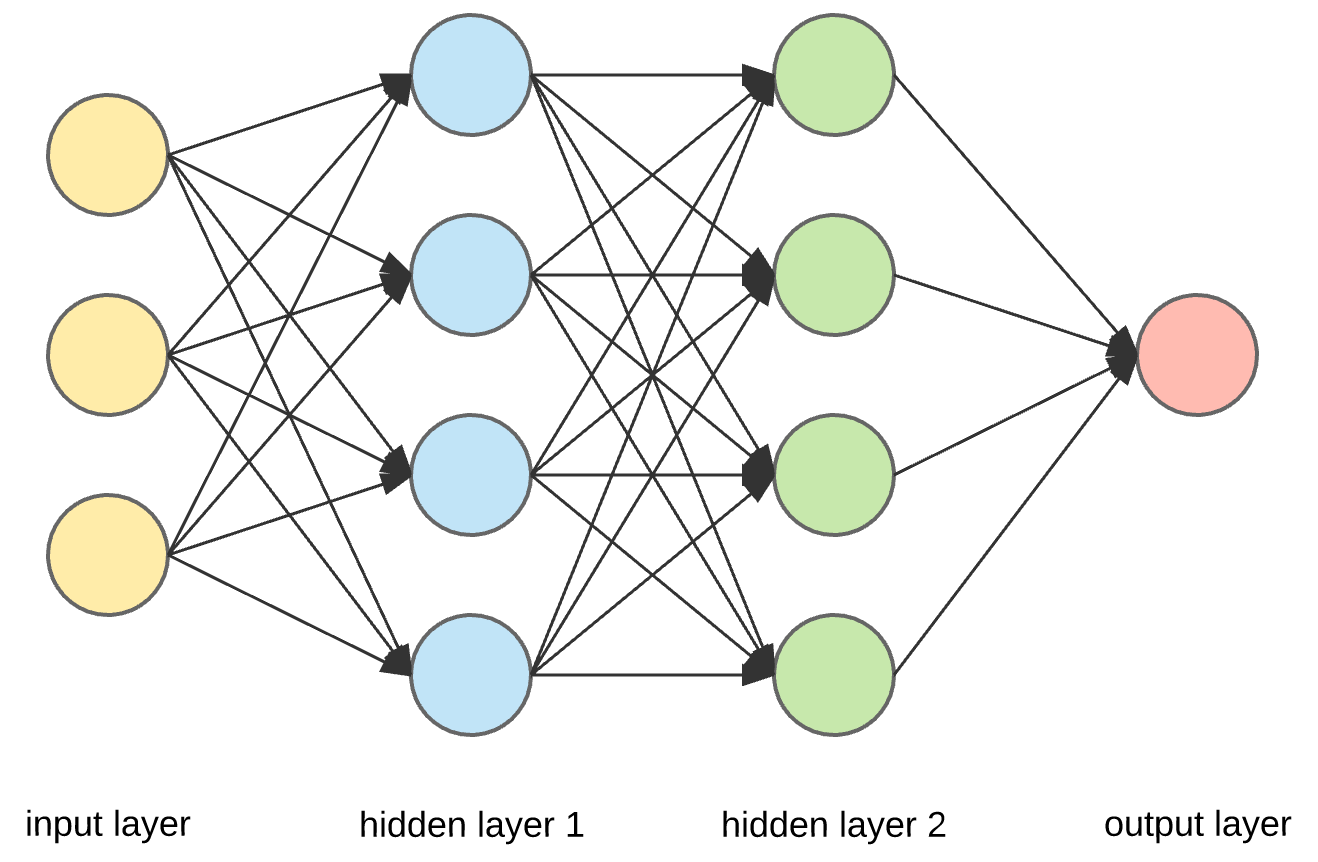

This function defines the neural network model according to passed parameters. activation function is always relu, the optimizer is adam and the loss function is given by the mean squared error.

In [74]:
def regression_model(n_cols, nodes_per_hid_layer=[10]):
    
    """
    n_cols: number of predictors to be fed as input
    nodes_per_hid_layer: array that contains the number of node for every hidden layer
    """
    
    # create model
    model = Sequential()
    
    #input layer
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    
    #hidden layer(s)
    for nodes in nodes_per_hid_layer:
        model.add(Dense(nodes, activation='relu'))
        
    #output layer
    model.add(Dense(1)) 
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

In [61]:
def train_evaluate_model(model, data, epochs, normalize):
    
    # make a copy of data to prevent modifications
    data_copy = data.copy()
    
    # split dataset
    y = data_copy.pop('Strength') #target variable
    X = data_copy #predictors
    
    #normalize
    if normalize:
        X = (X-X.mean())/X.std()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

    #train the model
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    
    #evaluate the model
    mse = mean_squared_error(y_test,model.predict(X_test))
    
    return mse
    

In [57]:
def evaluate_model(model, data, epochs=50, normalize=False, times=50):
    
    mse_array=np.zeros(times)
    
    for time in range(0,times):
        mse_array[time]=train_evaluate_model(model, data, epochs, normalize)
    
    mse_mean = mse_array.mean()
    mse_std = mse_array.std()
    
    return (mse_mean, mse_std)

## Testing
 This function takes in input a dataframe containing all the models parameters.
 For every model:
 1. creates the model,
 2. runs the model
     1. splits dataset into train and test set
     2. fits the model on train
     3. calculate the MSE on test
 3. repeats point 2 for 50 times
 4. calculate the mean and standard deviation of the MSEs generated during the 50 iterations

In [98]:
def run_models(data,models_df):

    for model_name in models_df:
        print("\n{} running...".format(model_name))
        #creates the model
        model = regression_model(n_cols=data.shape[1]-1, nodes_per_hid_layer=models_df[model_name]["Node per layer"])
        #runs the model 50 times
        mse=evaluate_model(model,data, epochs=models_df[model_name]["Epochs"], normalize=models_df[model_name]["Normalize"])
        #fill the dataframe
        models_df[model_name]["MSE Mean"]=mse[0]
        models_df[model_name]["MSE Std"]=mse[1]

In [100]:
models={
    "Model A":{
        "Node per layer": [10],
        "Epochs":50,
        "Normalize":False,
        "MSE Mean": 0.0,
        "MSE Std": 0.0
    },
    "Model B":{
        "Node per layer": [10],
        "Epochs":50,
        "Normalize":True, #with normalization
        "MSE Mean": 0.0,
        "MSE Std": 0.0
    },
    "Model C":{
        "Node per layer": [10],
        "Epochs":100, #100 epochs
        "Normalize":True,
        "MSE Mean": 0.0,
        "MSE Std": 0.0
    },
    "Model D":{
        "Node per layer": [10,10,10], #three hidden layers
        "Epochs":50,
        "Normalize":True,
        "MSE Mean": 0.0,
        "MSE Std": 0.0
    },
}

models_df=pd.DataFrame(models)        
run_models(concrete_data,models_df)
models_df


Model A running...
10/10 [==============================] - 0s 2ms/step

Model B running...
10/10 [==============================] - 0s 3ms/step

Model C running...
10/10 [==============================] - 0s 3ms/step

Model D running...
10/10 [==============================] - 0s 2ms/step


10/10 [==============================] - 0s 2ms/step


,Model A,Model B,Model C,Model D
Node per layer,[10],[10],[10],"[10, 10, 10]"
Epochs,50,50,100,50
Normalize,False,True,True,True
MSE Mean,54.331615,32.393365,31.679278,27.627082
MSE Std,20.402709,24.102191,18.385528,17.89486
